# `Group Project`
## `Initial imports and parameter setting`

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
import numpy as np
import statsmodels.api as sm
import statsmodels

%matplotlib inline

print('Python version: ' + sys.version)
print('Pandas version: ' + pd.__version__)
print('Matplotlib version: ' + matplotlib.__version__)
#print('Scikit-Learn version: ' + sklearn.__version__)
print('Interpreter path: ' + sys.executable)
print('Statsmodel version: ' + statsmodels.__version__)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 1000)


Python version: 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Pandas version: 0.23.0
Matplotlib version: 2.2.2
Interpreter path: C:\ProgramData\Anaconda3\python.exe
Statsmodel version: 0.9.0


## `Read in the data sheet`

In [2]:
df_main = pd.read_excel('CG_dataset_with_correl_region_err.xlsx', sheet_name='Data')

## `These are the numeric headers in the data file. These are used to run the correlation.`

In [3]:
numeric_hdrs = [
    'HAS_QUOTA', 'QUOTA_PCNT', 'QUOTA_PTF', 'QUOTA_SOE', 'QUOTA_PASSAGE_YEAR', 'QUOTA_COMPLIANCE_YEAR', 'bsize', 'mbsize',
    'sbsize', 'edirs', 'nedirs', 'idirs', '%brd_indp', 'bind', 'lstruc', 'ceooutside', 'nomcom', 'nomcomind', 'nomcomchart', 
    'nomcomsize', 'nomcommeet', 'femnom', 'meetatt', 'leaddir', 'boardmeet', 'mboardmeet', 'sboardmeet', 'femboard', 'femmboard',
    'femsboard', 'femceo', 'femchair', 'ceoage', 'ceoten', 'cgcomm', 'hrcomm', 'execcomm', 'investcomm', 'csrcomm', 'fincomm',
    'execmmem', 'disclcoe', 'cgdiscl', 'audcomm', 'audcommind', 'audcommmeet', 'finexp', 'audcommchart', 'audcommsize', 'femaud',
    'audfees', 'aud2fees', 'taxfees', 'othfees', 'totfees', 'big4', 'compcomm', 'compcommind', 'compcommchar', 'compcommsize',
    'compcommmeet', 'femcomp', 'bown1st', 'bown1stper', 'mown1st', 'mown1stper', 'neown1st', 'neown1stper', 'indown1st',
    'indown1stper', 'ceoown1st', 'ceoown1stper', 'eblock1st', 'eblock1stper', 'iiown1st', 'iiown1stper', 'emown1st', 'emown1stper',
    'misc1st', 'misc1stper', 'state1st', 'state1stper', 'wheld1st', 'wheld1stper', 'largest1st', 'largest1stper', 'top51st',
    'top51stper', 'large1st', 'ff_sales', 'ff_oper_inc', 'assets', 'ff_assets_intl', 'ff_emp_num', 'ff_rd_exp', 'R&D_INTENSITY',
    'ff_roe', 'familyfirm', 'ffdef2', 'ffdef3', 'ffdef4', 'ffdef5', 'ffdef6', 'ffdef7', 'ffdef8', 'ffdef9', 'ffdef10', 'ffdef11',
    'ffdef12', 'ffdef13', 'ffdef14', 'ffdef15', 'ffdef17', 'ffdef18', 'ffdef19', 'ffunlist', 'ffident', 'ffmgt', 'ceohired', 'ceofounder',
    'ceodescend', 'chairfounder', 'chairdescend', 'chairoutside', 'chairceohire', 'chairceofounder', 'chairceodescend',
    'ffpercent', 'dualclass_ff', 'descendboard', 'desendmgt', 'founderboard', 'nffpercent', 'lonefounder', 'fflargest',
    'fflargestmgt', 'mltpbh', 'wedge', 'FamilyBoardMembers'
]


df_numerics = df_main[numeric_hdrs].copy()

df_corr = df_numerics.corr(method='pearson')
# df_corr.to_excel('correlation.xlsx')
df_corr

,HAS_QUOTA,QUOTA_PCNT,QUOTA_PTF,QUOTA_SOE,QUOTA_PASSAGE_YEAR,QUOTA_COMPLIANCE_YEAR,bsize,mbsize,sbsize,edirs,nedirs,idirs,%brd_indp,bind,lstruc,ceooutside,nomcom,nomcomind,nomcomchart,nomcomsize,nomcommeet,femnom,meetatt,leaddir,boardmeet,mboardmeet,sboardmeet,femboard,femmboard,femsboard,femceo,femchair,ceoage,ceoten,cgcomm,hrcomm,execcomm,investcomm,csrcomm,fincomm,execmmem,disclcoe,cgdiscl,audcomm,audcommind,audcommmeet,finexp,audcommchart,audcommsize,femaud,audfees,aud2fees,taxfees,othfees,totfees,big4,compcomm,compcommind,compcommchar,compcommsize,compcommmeet,femcomp,bown1st,bown1stper,mown1st,mown1stper,neown1st,neown1stper,indown1st,indown1stper,ceoown1st,ceoown1stper,eblock1st,eblock1stper,iiown1st,iiown1stper,emown1st,emown1stper,misc1st,misc1stper,state1st,state1stper,wheld1st,wheld1stper,largest1st,largest1stper,top51st,top51stper,large1st,ff_sales,ff_oper_inc,assets,ff_assets_intl,ff_emp_num,ff_rd_exp,R&D_INTENSITY,ff_roe,familyfirm,ffdef2,ffdef3,ffdef4,ffdef5,ffdef6,ffdef7,ffdef8,ffdef9,ffdef10,ffdef11,ffdef12,ffdef13,ffdef14,ffdef15,ffdef17,ffdef18,ffdef19,ffunlist,ffident,ffmgt,ceohired,ceofounder,ceodescend,chairfounder,chairdescend,chairoutside,chairceohire,chairceofounder,chairceodescend,ffpercent,dualclass_ff,descendboard,desendmgt,founderboard,nffpercent,lonefounder,fflargest,fflargestmgt,mltpbh,wedge,FamilyBoardMembers
HAS_QUOTA,1.000000,0.994839,0.791133,0.731973,NaN,NaN,0.048112,0.065231,0.032226,-0.070200,0.246213,-0.096859,-0.135988,-0.129203,-0.028001,-0.076941,-0.105564,-0.276471,-0.152785,-0.097415,0.071621,-0.013542,0.132665,-0.175806,-0.006511,-0.226452,0.085107,0.152880,0.170693,0.273795,-0.007833,0.015300,0.020523,0.001701,-0.214764,-0.063071,-0.035205,0.065220,-0.083297,-0.095136,-0.097481,-0.006650,0.037963,0.003930,-0.253021,-0.075777,-0.132223,-0.129000,-0.094955,0.041759,-0.014235,0.000700,-0.023842,-0.010385,-0.005138,0.048362,0.018294,-0.255383,-0.166505,-0.101148,-0.143132,0.001457,-0.013288,0.025332,-0.016404,-0.004341,-0.006900,0.074538,-0.005231,-0.014218,-0.021488,-0.013311,-0.002615,0.271548,-0.002614,-0.103791,-0.021471,-0.026811,-0.009038,-0.007086,-0.011457,0.033259,-0.002614,0.039334,-0.002617,0.194578,-0.002615,0.155442,0.101327,-0.041160,-0.031948,-0.040989,-0.011216,-0.015601,-0.057029,0.016120,-0.008570,0.068040,0.005964,0.083622,0.076101,0.087692,0.090023,0.126056,0.112158,0.235595,0.156771,0.058186,NaN,0.022780,0.077395,0.105560,0.029861,0.239951,0.046203,-0.005811,-0.015581,-0.023656,-0.060073,-0.032742,0.044016,0.024690,0.085307,-0.054016,0.008180,0.041270,0.078997,0.141657,-0.018812,0.152311,0.100041,0.020111,-0.000006,-0.055319,0.064160,0.061491,-0.003531,0.005166,0.104498
QUOTA_PCNT,0.994839,1.000000,0.818395,0.693710,-0.578475,-0.291580,0.044509,0.064966,0.031574,-0.072932,0.243808,-0.093039,-0.128388,-0.120590,-0.031482,-0.078763,-0.101185,-0.276914,-0.146974,-0.097001,0.076351,-0.012442,0.125204,-0.187636,-0.003907,-0.226116,0.084802,0.161614,0.170691,0.273792,-0.011361,0.016028,0.019711,0.001795,-0.212140,-0.061981,-0.039946,0.072798,-0.080577,-0.090617,-0.087938,-0.004457,0.041964,-0.003733,-0.255912,-0.076204,-0.131458,-0.121990,-0.089950,0.050325,-0.011521,0.002043,-0.022816,-0.009575,-0.002627,0.050286,0.010252,-0.257685,-0.160078,-0.097480,-0.134537,0.008691,-0.013185,0.020085,-0.016836,-0.013108,-0.006695,0.076083,-0.004935,-0.011081,-0.021849,-0.018687,-0.002601,0.263881,-0.002600,-0.097877,-0.020074,-0.022880,-0.008918,-0.005620,-0.011409,0.034574,-0.002601,0.041431,-0.002603,0.184917,-0.002601,0.148024,0.113139,-0.040806,-0.031523,-0.040528,-0.010354,-0.011585,-0.056740,0.014258,-0.007968,0.059659,0.003388,0.077564,0.067574,0.081921,0.084221,0.118762,0.104681,0.225610,0.148576,0.052598,NaN,0.027048,0.069053,0.099443,0.032184,0.232764,0.040781,-0.009385,-0.018869,-0.027828,-0.066271,-0.033890,0.036984,0.019446,0.081246,-0.050938,0.014350,0.038000,0.076929,0.133291,-0.020815,0.149898,0.093159,0.021122,-0.002595,-0.057088,0.059115,0.055967,-0.005601,0.00569

### `Set gender related variable headers`

In [4]:
def to_integer(x):
    try:
        return int(x)
    except ValueError:
        return None

fem_hdrs = [
    'HAS_QUOTA', 'QUOTA_PCNT', 'femnom', 'femboard', 'femmboard', 'femsboard', 'femceo', 'femchair', 'femaud', 'femcomp'
]






## `Data spread for Female Director(s) on nomination committee (femnom).`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C5CDA0A20>]],
      dtype=object)

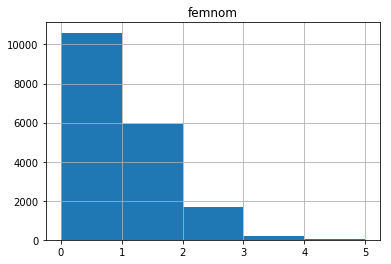

In [5]:
df_femnom = df_main[['femnom']].copy()
df_femnom['femnom'] = df_femnom['femnom'].apply(to_integer)
df_femnom.hist(bins=5)





In [6]:
df_femnom['femnom'].value_counts()

0.0    10602
1.0     5946
2.0     1674
3.0      219
4.0       32
5.0        3
Name: femnom, dtype: int64

## `Data spread for Female Director(s) on board (femboard).`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C6FF81710>]],
      dtype=object)

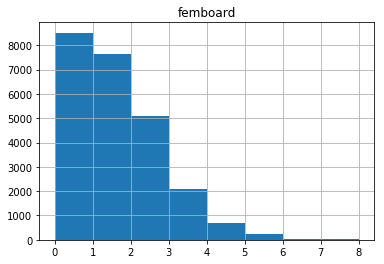

In [7]:
df_femboard = df_main[['femboard']].copy()
df_femboard['femboard'] = df_femboard['femboard'].apply(to_integer)
df_femboard.hist(bins=8, range=(0,8))




In [8]:
df_femboard['femboard'].value_counts()

0.0    8517
1.0    7655
2.0    5088
3.0    2097
4.0     701
5.0     250
6.0      44
7.0      19
8.0       2
9.0       1
Name: femboard, dtype: int64

## `Data spread for Female Director on Management Board (femmboard).`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C705929E8>]],
      dtype=object)

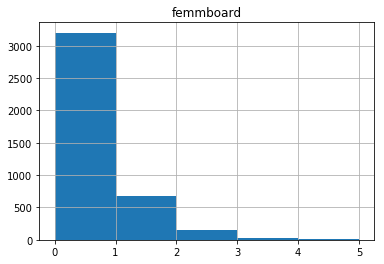

In [9]:
df_femmboard = df_main[['femmboard']].copy()
df_femmboard['femmboard'] = df_femmboard['femmboard'].apply(to_integer)
df_femmboard.hist(bins=5, range=(0,5))




In [10]:
df_femmboard['femmboard'].value_counts()

0.0    3201
1.0     672
2.0     157
3.0      24
4.0       9
Name: femmboard, dtype: int64

## `Data spread for Female Director on Supervisory Board (femsboard).`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C70C1CEF0>]],
      dtype=object)

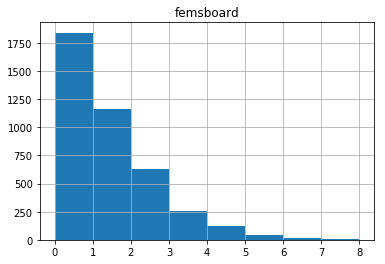

In [11]:
df_femsboard = df_main[['femsboard']].copy()
df_femsboard['femsboard'] = df_femsboard['femsboard'].apply(to_integer)
df_femsboard.hist(bins=8)




In [12]:
df_femsboard['femsboard'].value_counts()

0.0    1841
1.0    1162
2.0     625
3.0     253
4.0     119
5.0      43
6.0      12
7.0       6
8.0       2
Name: femsboard, dtype: int64

## `Data spread for Woman CEO (femceo).`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C71A9D5C0>]],
      dtype=object)

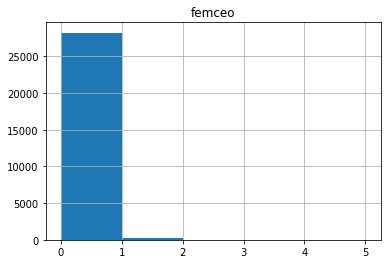

In [13]:
df_femceo = df_main[['femceo']].copy()
df_femceo['femceo'] = df_femceo['femceo'].apply(to_integer)
df_femceo.hist(bins=5, range=(0,5))




In [14]:
df_femceo['femceo'].value_counts()

0    28221
1      216
Name: femceo, dtype: int64

## `Data spread for Woman Chairperson (femchair).`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C61E256A0>]],
      dtype=object)

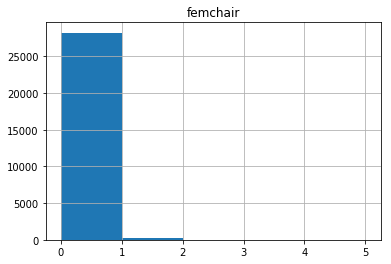

In [15]:
df_femchair = df_main[['femchair']].copy()
df_femchair['femchair'] = df_femchair['femchair'].apply(to_integer)
df_femchair.hist(bins=5, range=(0,5))




In [16]:
df_femchair['femchair'].value_counts()

0    28233
1      203
2        1
Name: femchair, dtype: int64

## `Data spread for Female Director(s) on audit committee (femaud).`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C7557C4E0>]],
      dtype=object)

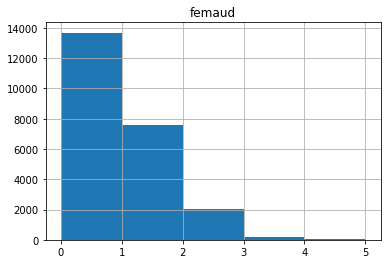

In [17]:
df_femaud = df_main[['femaud']].copy()
df_femaud['femaud'] = df_femaud['femaud'].apply(to_integer)
df_femaud.hist(bins=5)




In [18]:
df_femaud['femaud'].value_counts()

0.0    13687
1.0     7572
2.0     2042
3.0      205
4.0       38
5.0        6
Name: femaud, dtype: int64

## `Data spread for Female Director(s) on remuneration committee (femcomp).`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019C72B157B8>]],
      dtype=object)

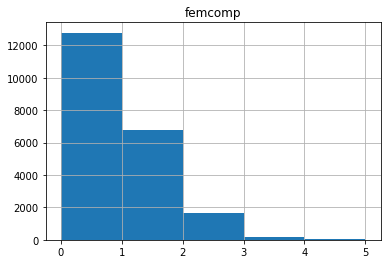

In [19]:
df_femcomp = df_main[['femcomp']].copy()
df_femcomp['femcomp'] = df_femcomp['femcomp'].apply(to_integer)
df_femcomp.hist(bins=5)


In [20]:
df_femcomp['femcomp'].value_counts()

0.0    12773
1.0     6758
2.0     1674
3.0      191
4.0       21
5.0        3
Name: femcomp, dtype: int64

## `Notable: There appears to be a relationship between having women on the board and the board size.`

### `With a correlation of ~0.303 there appeared to be some relationship between the data. In the regression below, we see an R-squared of 0.546 with a P-value of ~0.0 indicating a better-than-not likelihood that the size of the board is increased when a woman is added to the board. This seems to show a trend of adding a woman to the board as an n+1 (where n is the original board size) rather than maintaining the same n via replacing an existing member.`

####  `R-Squared: 0.546; P-value: ~0.0; Observations: 24,374`

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bsize   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                 2.931e+04
Date:                Sat, 23 Feb 2019   Prob (F-statistic):               0.00
Time:                        17:40:51   Log-Likelihood:                -80572.
No. Observations:               24374   AIC:                         1.611e+05
Df Residuals:                   24373   BIC:                         1.612e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
femboard       4.3616      0.025    171.207      0.000       4.312       4.412
==============================================================================
Omnibus:                      656.262   Durbin-Watson:                   0.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1184.313
Skew:                          -0.221   Prob(JB):                    6.76e-258
Kurtosis:                       3.985   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

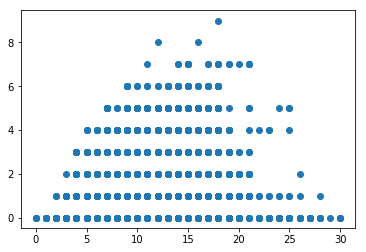

In [21]:
df_board_w_fem = df_main[['bsize', 'femboard']].copy()
df_board_w_fem['bsize'] = df_board_w_fem['bsize'].apply(to_integer)
df_board_w_fem['femboard'] = df_board_w_fem['femboard'].apply(to_integer)

df_board_w_fem = df_board_w_fem.dropna()

plt.scatter(df_board_w_fem['bsize'], df_board_w_fem['femboard'])

x = df_board_w_fem['femboard']
y = df_board_w_fem['bsize']

model = sm.OLS(y, x).fit()

model.summary()




## `Notable: There appears to be little to no relationship between having a quota for gender diversity on a board and the actual amount of women on the board.`

### `Countries were coded if they had a quota (1) or not (0) and when the quota came into place.`

#### `R-Squared: 0.151; P-value: ~0.0; Observations: 24,374`

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               femboard   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     4329.
Date:                Sat, 23 Feb 2019   Prob (F-statistic):               0.00
Time:                        17:40:51   Log-Likelihood:                -44929.
No. Observations:               24374   AIC:                         8.986e+04
Df Residuals:                   24373   BIC:                         8.987e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HAS_QUOTA      1.5725      0.024     65.795      0.000       1.526       1.619
==============================================================================
Omnibus:                     1732.608   Durbin-Watson:                   0.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2335.255
Skew:                           0.627   Prob(JB):                         0.00
Kurtosis:                       3.853   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

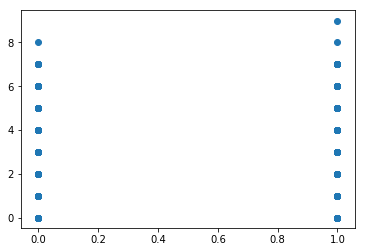

In [22]:
df_quota_w_fem = df_main[['HAS_QUOTA', 'femboard']].copy()
df_quota_w_fem['HAS_QUOTA'] = df_quota_w_fem['HAS_QUOTA'].apply(to_integer)
df_quota_w_fem['femboard'] = df_quota_w_fem['femboard'].apply(to_integer)

plt.scatter(df_quota_w_fem['HAS_QUOTA'], df_quota_w_fem['femboard'])

df_quota_w_fem = df_quota_w_fem.dropna()


x = df_quota_w_fem['HAS_QUOTA']
y = df_quota_w_fem['femboard']

model = sm.OLS(y, x).fit()

model.summary()


## `There appears to be no relationship between having a quota for gender diversity on boards and the actual amount of women on the management board.`

#### `R-Squared: 0.088; P-value: ~0.0; Observations: 4,063`

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              femmboard   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     393.3
Date:                Sat, 23 Feb 2019   Prob (F-statistic):           1.27e-83
Time:                        17:40:52   Log-Likelihood:                -3759.0
No. Observations:                4063   AIC:                             7520.
Df Residuals:                    4062   BIC:                             7526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HAS_QUOTA      0.5234      0.026     19.832      0.000       0.472       0.575
==============================================================================
Omnibus:                     1968.744   Durbin-Watson:                   0.455
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12192.250
Skew:                           2.266   Prob(JB):                         0.00
Kurtosis:                      10.175   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

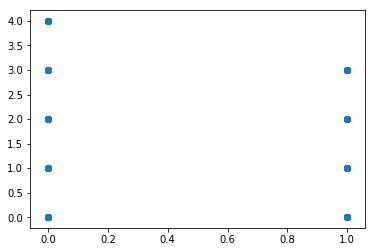

In [23]:
df_quota_w_femm = df_main[['HAS_QUOTA', 'femmboard']].copy()
df_quota_w_femm['HAS_QUOTA'] = df_quota_w_femm['HAS_QUOTA'].apply(to_integer)
df_quota_w_femm['femmboard'] = df_quota_w_femm['femmboard'].apply(to_integer)

plt.scatter(df_quota_w_femm['HAS_QUOTA'], df_quota_w_femm['femmboard'])

df_quota_w_femm = df_quota_w_femm.dropna()

x = df_quota_w_femm['HAS_QUOTA']
y = df_quota_w_femm['femmboard']

model = sm.OLS(y, x).fit()

model.summary()

## `There appears to be little to no relationship between having a quota for gender diversity on boards and the actual amount of women on the supervisory board.`

#### `R-Squared: 0.183; P-value ~0.0; Observations: 4,063`

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              femsboard   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     907.3
Date:                Sat, 23 Feb 2019   Prob (F-statistic):          4.40e-180
Time:                        17:40:52   Log-Likelihood:                -7138.4
No. Observations:                4063   AIC:                         1.428e+04
Df Residuals:                    4062   BIC:                         1.429e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HAS_QUOTA      1.8262      0.061     30.121      0.000       1.707       1.945
==============================================================================
Omnibus:                      859.690   Durbin-Watson:                   0.388
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2002.991
Skew:                           1.183   Prob(JB):                         0.00
Kurtosis:                       5.497   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

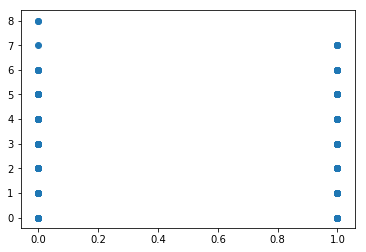

In [24]:
df_quota_w_fems = df_main[['HAS_QUOTA', 'femsboard']].copy()
df_quota_w_fems['HAS_QUOTA'] = df_quota_w_fems['HAS_QUOTA'].apply(to_integer)
df_quota_w_fems['femsboard'] = df_quota_w_fems['femsboard'].apply(to_integer)

plt.scatter(df_quota_w_fems['HAS_QUOTA'], df_quota_w_fems['femsboard'])

df_quota_w_fems = df_quota_w_fems.dropna()


x = df_quota_w_fems['HAS_QUOTA']
y = df_quota_w_fems['femsboard']

model = sm.OLS(y, x).fit()

model.summary()

## `Notable: There appears to be little to no relationship between having a quota for gender diversity for Privately Traded Firms (PTFs) on a board and the actual amount of women on the board.`

#### `R-Squared: 0.123; P-value ~0.0; Observations: 24,374`

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               femboard   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     3409.
Date:                Sat, 23 Feb 2019   Prob (F-statistic):               0.00
Time:                        17:40:52   Log-Likelihood:                -45326.
No. Observations:               24374   AIC:                         9.065e+04
Df Residuals:                   24373   BIC:                         9.066e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
QUOTA_PTF      1.7340      0.030     58.386      0.000       1.676       1.792
==============================================================================
Omnibus:                     1853.847   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2571.509
Skew:                           0.646   Prob(JB):                         0.00
Kurtosis:                       3.928   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

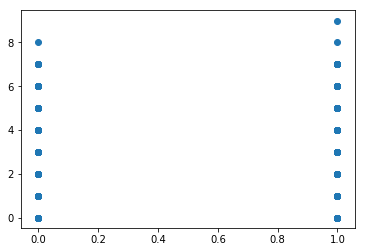

In [25]:
df_quota_w_fem = df_main[['QUOTA_PTF', 'femboard']].copy()
df_quota_w_fem['QUOTA_PTF'] = df_quota_w_fem['QUOTA_PTF'].apply(to_integer)
df_quota_w_fem['femboard'] = df_quota_w_fem['femboard'].apply(to_integer)

plt.scatter(df_quota_w_fem['QUOTA_PTF'], df_quota_w_fem['femboard'])

df_quota_w_fem = df_quota_w_fem.dropna()


x = df_quota_w_fem['QUOTA_PTF']
y = df_quota_w_fem['femboard']

model = sm.OLS(y, x).fit()

model.summary()


## `There appears to be no relationship between having a quota for gender diversity for Privately Traded Firms (PTFs) on a board and the amount of women on the management board.`

#### `R-Squared: 0.009; P-value ~0.0; Observations: 4,063`

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              femmboard   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     35.97
Date:                Sat, 23 Feb 2019   Prob (F-statistic):           2.18e-09
Time:                        17:40:53   Log-Likelihood:                -3928.8
No. Observations:                4063   AIC:                             7860.
Df Residuals:                    4062   BIC:                             7866.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
QUOTA_PTF      0.2052      0.034      5.997      0.000       0.138       0.272
==============================================================================
Omnibus:                     2089.372   Durbin-Watson:                   0.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12699.709
Skew:                           2.455   Prob(JB):                         0.00
Kurtosis:                      10.135   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

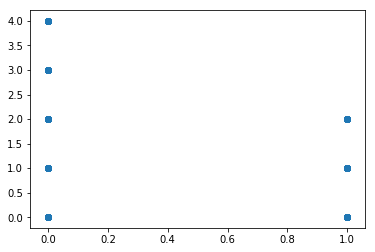

In [26]:
df_quota_w_femm = df_main[['QUOTA_PTF', 'femmboard']].copy()
df_quota_w_femm['QUOTA_PTF'] = df_quota_w_femm['QUOTA_PTF'].apply(to_integer)
df_quota_w_femm['femmboard'] = df_quota_w_femm['femmboard'].apply(to_integer)

plt.scatter(df_quota_w_femm['QUOTA_PTF'], df_quota_w_femm['femmboard'])

df_quota_w_femm = df_quota_w_femm.dropna()

x = df_quota_w_femm['QUOTA_PTF']
y = df_quota_w_femm['femmboard']

model = sm.OLS(y, x).fit()

model.summary()

## `There appears to be little to no relationship between having a quota for gender diversity for Privately Traded Firms (PTFs) on a board and the amount of women on the supervisory board.`

#### `R-Squared: 0.138; P-value ~0.0; Observations: 4,063`

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              femsboard   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     652.3
Date:                Sat, 23 Feb 2019   Prob (F-statistic):          1.44e-133
Time:                        17:40:53   Log-Likelihood:                -7245.4
No. Observations:                4063   AIC:                         1.449e+04
Df Residuals:                    4062   BIC:                         1.450e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
QUOTA_PTF      1.9769      0.077     25.541      0.000       1.825       2.129
==============================================================================
Omnibus:                      820.651   Durbin-Watson:                   0.368
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1785.349
Skew:                           1.161   Prob(JB):                         0.00
Kurtosis:                       5.270   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

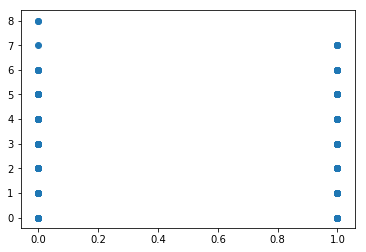

In [27]:
df_quota_w_fems = df_main[['QUOTA_PTF', 'femsboard']].copy()
df_quota_w_fems['QUOTA_PTF'] = df_quota_w_fems['QUOTA_PTF'].apply(to_integer)
df_quota_w_fems['femsboard'] = df_quota_w_fems['femsboard'].apply(to_integer)

plt.scatter(df_quota_w_fems['QUOTA_PTF'], df_quota_w_fems['femsboard'])

df_quota_w_fems = df_quota_w_fems.dropna()


x = df_quota_w_fems['QUOTA_PTF']
y = df_quota_w_fems['femsboard']

model = sm.OLS(y, x).fit()

model.summary()

## `Notable: There appears to be a relationship between those countries that do have quotas and the percentage of women on the board that the quota requires.`

### `In countries which have a quota, it appears that the higher the quota, the more women are on the boards. This may indicate that if there is a quota, companies only do what they can to fulfil it and nothing more.`

#### `R-Squared: 0.584; P-value ~0.0; Observations: 4,091`

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               femboard   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     5732.
Date:                Sat, 23 Feb 2019   Prob (F-statistic):               0.00
Time:                        17:40:53   Log-Likelihood:                -7011.9
No. Observations:                4091   AIC:                         1.403e+04
Df Residuals:                    4090   BIC:                         1.403e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
QUOTA_PCNT     4.2021      0.056     75.711      0.000       4.093       4.311
==============================================================================
Omnibus:                      465.832   Durbin-Watson:                   0.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              652.238
Skew:                           0.887   Prob(JB):                    2.34e-142
Kurtosis:                       3.825   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

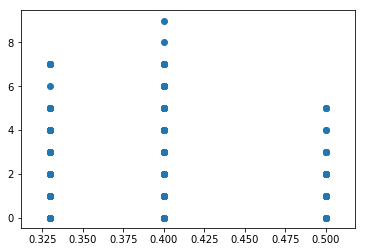

In [28]:
df_quota_w_fem = df_main[['HAS_QUOTA', 'QUOTA_PCNT', 'femboard']].copy()
df_quota_w_fem = df_quota_w_fem[df_quota_w_fem['HAS_QUOTA'] == 1]

df_quota_w_fem['HAS_QUOTA'] = df_quota_w_fem['HAS_QUOTA'].apply(to_integer)
df_quota_w_fem['femboard'] = df_quota_w_fem['femboard'].apply(to_integer)

plt.scatter(df_quota_w_fem['QUOTA_PCNT'], df_quota_w_fem['femboard'])

df_quota_w_fem = df_quota_w_fem.dropna()


x = df_quota_w_fem['QUOTA_PCNT']
y = df_quota_w_fem['femboard']

model = sm.OLS(y, x).fit()

model.summary()

## `There appears a small but insignificant relationship between those countries that do have quotas and the percentage of women on the management board that the quota requires. (Specifically relates to countries with two-tier board structures).`

#### `R-Squared: 0.330; P-value ~0.0; Observations: 535`

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              femmboard   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     263.0
Date:                Sat, 23 Feb 2019   Prob (F-statistic):           2.17e-48
Time:                        17:40:53   Log-Likelihood:                -602.13
No. Observations:                 535   AIC:                             1206.
Df Residuals:                     534   BIC:                             1211.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
QUOTA_PCNT     1.3099      0.081     16.218      0.000       1.151       1.469
==============================================================================
Omnibus:                      102.063   Durbin-Watson:                   0.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.923
Skew:                           1.271   Prob(JB):                     3.09e-35
Kurtosis:                       3.817   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

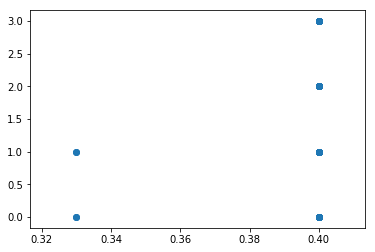

In [29]:
df_quota_w_femm = df_main[['HAS_QUOTA', 'QUOTA_PCNT', 'femmboard']].copy()
df_quota_w_femm = df_quota_w_femm[df_quota_w_femm['HAS_QUOTA'] == 1]

df_quota_w_femm['HAS_QUOTA'] = df_quota_w_femm['HAS_QUOTA'].apply(to_integer)
df_quota_w_femm['femmboard'] = df_quota_w_femm['femmboard'].apply(to_integer)

plt.scatter(df_quota_w_femm['QUOTA_PCNT'], df_quota_w_femm['femmboard'])

df_quota_w_femm = df_quota_w_femm.dropna()

x = df_quota_w_femm['QUOTA_PCNT']
y = df_quota_w_femm['femmboard']

model = sm.OLS(y, x).fit()

model.summary()

## `Notable: There appears to be a significant relationship between those countries that do have quotas and the percentage of women on the supervisory board that the quota requires. (Specifically relates to countries with two-tier board structures).`

#### `R-Squared: 0.626; P-value ~0.0; Observations: 535`

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              femsboard   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     892.8
Date:                Sat, 23 Feb 2019   Prob (F-statistic):          4.78e-116
Time:                        17:40:54   Log-Likelihood:                -943.81
No. Observations:                 535   AIC:                             1890.
Df Residuals:                     534   BIC:                             1894.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
QUOTA_PCNT     4.5706      0.153     29.879      0.000       4.270       4.871
==============================================================================
Omnibus:                       78.482   Durbin-Watson:                   0.608
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.500
Skew:                           0.984   Prob(JB):                     8.31e-26
Kurtosis:                       4.143   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

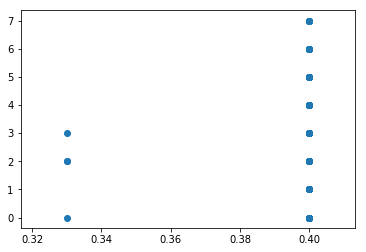

In [30]:
df_quota_w_fems = df_main[['HAS_QUOTA', 'QUOTA_PCNT', 'femsboard']].copy()
df_quota_w_fems = df_quota_w_fems[df_quota_w_fems['HAS_QUOTA'] == 1]

df_quota_w_fems['HAS_QUOTA'] = df_quota_w_fems['HAS_QUOTA'].apply(to_integer)
df_quota_w_fems['femsboard'] = df_quota_w_fems['femsboard'].apply(to_integer)

plt.scatter(df_quota_w_fems['QUOTA_PCNT'], df_quota_w_fems['femsboard'])

df_quota_w_fems = df_quota_w_fems.dropna()


x = df_quota_w_fems['QUOTA_PCNT']
y = df_quota_w_fems['femsboard']

model = sm.OLS(y, x).fit()

model.summary()